In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import random

In [4]:
M = 2 # количество скрытых состояний (честная кость/нечестная кость)
K = 6 # количество возможных наблюдаемых состояний
L = 300 # количество бросков кости
Tr = np.array([[0.95, 0.05],
               [0.1, 0.9]]) # матрица переходов
Em = np.array([[1 / 6 for i in range(6)],
               [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]) # матрица наблюдений
pi0 = np.array([2 / 3, 1 / 3]) # начальное распределение

In [5]:
# Генерация случайной последовательности на основе Скрытой марковской модели
# Получаем последовательности скрытых состояний и наблюдений

def HMM(Tr, Em, pi0, L):
    hidden_seq = np.zeros(L, dtype=np.int)
    observation_seq = np.zeros(L, dtype=np.int)

    hidden_seq[0] = np.random.choice([0, 1], size=1, p = pi0)
    observation_seq[0] = np.random.choice([1, 2, 3, 4, 5, 6], p=Em[int(hidden_seq[0])])
    for i in range(1, L):
        hidden_seq[i] = np.random.choice([0, 1], p=Tr[int(hidden_seq[i-1])])
        observation_seq[i] = np.random.choice([1, 2, 3, 4, 5, 6], p=Em[int(hidden_seq[i-1])])
    return hidden_seq, observation_seq

hid_seq, obs_seq = HMM(Tr, Em, pi0, L)
print(hid_seq)
print(obs_seq)

[0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[6 6 3 4 2 6 5 6 6 6 1 6 6 6 4 1 1 1 4 3 6 2 6 5 4 6 6 3 5 6 2 6 4 6 3 2 1
 6 6 4 1 5 1 2 4 2 1 3 2 2 4 5 4 3 5 4 6 6 6 2 6 4 6 6 3 6 4 3 2 5 5 5 6 4
 1 5 5 4 4 4 2 1 6 1 6 5 4 2 5 3 3 3 4 2 1 6 6 6 5 2 6 6 4 6 4 3 3 4 6 6 6
 6 4 5 1 6 6 6 5 6 4 5 6 5 2 2 1 3 1 5 5 6 5 1 6 1 1 1 6 6 5 3 3 2 6 2 6 1
 6 4 6 6 2 6 6 6 4 2 2 6 2 2 2 6 5 5 1 1 3 4 1 6 4 6 6 1 1 2 4 2 5 2 1 1 1
 5 5 5 3 6 6 5 

In [8]:
# Алгоритм Витерби

V = np.zeros((L, M))
ptr = np.zeros((L, M), dtype=np.int)
V[0] = Em[:,obs_seq[0] - 1] * pi0
for i in range(1, L):
    V[i, 0] = Em[0, obs_seq[i] - 1] * max(V[i - 1] * Tr[:, 0])
    V[i, 1] = Em[1, obs_seq[i] - 1] * max(V[i - 1] * Tr[:, 1])
    ptr[i, 0] = np.argmax(V[i - 1] * Tr[:,0])
    ptr[i, 1] = np.argmax(V[i - 1] * Tr[:,1])
path = np.zeros(L, dtype=np.int)
path[L - 1] = np.argmax(V[L - 1])
i = L - 2    
while i != -1:
    path[i] = ptr[i + 1, path[i + 1]]
    i -= 1
print(path)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


<IPython.core.display.Javascript object>


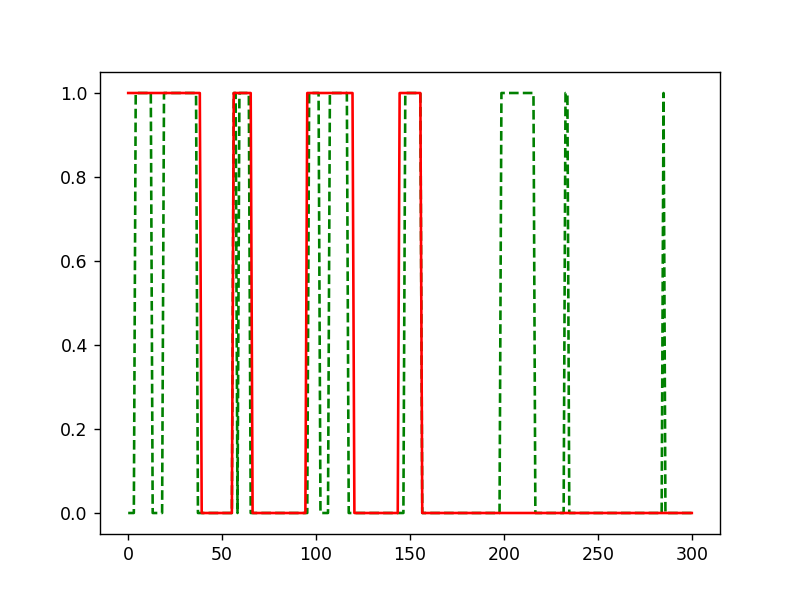

In [9]:
# зеленый - смоделированный путь, красный - путь найденный алгоритмом Витерби

x = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1)
ax.plot(x, hid_seq, '--', color='g')
ax.plot(x, path, color='r')

In [13]:
#Алгоритм просмотра вперед

def forward(Tr, Em, pi0, L, observation_seq):
    f = np.zeros((L, M))
    f[0] = pi0 * Em[:,observation_seq[0] - 1]

    for i in range(1, L):
        f[i] = Em[:,(observation_seq[i]) - 1] * np.matmul(f[i - 1], Tr)

    forward_probability = f[-1][0] + f[-1][1]
    return f, forward_probability

f_k, forw_prob = forward(Tr, Em, pi0, L, obs_seq)
print(forw_prob)

1.5989063881796183e-227


In [14]:
#Алгоритм просмотра назад

def backward(Tr, Em, pi0, L, observation_seq):
    b = np.zeros((M, L))
    b[:,-1:] = 1

    for i in range(L - 2, -1, -1):
        for j in range(M):
            b[j, i] = np.sum(Tr[j] * Em[:, (observation_seq[i + 1]) - 1] * b[:,i + 1])

    backward_probability = np.sum(pi0 * Em[:, (observation_seq[0]) - 1] * b[:,0])
    return b, backward_probability

b_k, back_prob = backward(Tr, Em, pi0, L, obs_seq)
print(back_prob)

1.5989063881796324e-227


In [15]:
#Апостериорное дешифрование

P = np.zeros((L, M))

for i in range(L):
    for j in range(M):
        P[i, j] = (f_k[i, j] * b_k[j, i]) / back_prob
print(P)

[[0.19254116 0.80745884]
 [0.18942226 0.81057774]
 [0.25048417 0.74951583]
 [0.26253806 0.73746194]
 [0.22984059 0.77015941]
 [0.14084508 0.85915492]
 [0.12158678 0.87841322]
 [0.05644205 0.94355795]
 [0.03698707 0.96301293]
 [0.03939901 0.96060099]
 [0.06663132 0.93336868]
 [0.06092039 0.93907961]
 [0.08616155 0.91383845]
 [0.17326282 0.82673718]
 [0.42888057 0.57111943]
 [0.5662376  0.4337624 ]
 [0.63383979 0.36616021]
 [0.65555998 0.34444002]
 [0.6390684  0.3609316 ]
 [0.57854125 0.42145875]
 [0.45260414 0.54739586]
 [0.43415056 0.56584944]
 [0.3641742  0.6358258 ]
 [0.37648659 0.62351341]
 [0.34282219 0.65717781]
 [0.25129284 0.74870716]
 [0.24152192 0.75847808]
 [0.30154482 0.69845518]
 [0.31206297 0.68793703]
 [0.27679072 0.72320928]
 [0.31147798 0.68852202]
 [0.30043112 0.69956888]
 [0.36607921 0.63392079]
 [0.38074174 0.61925826]
 [0.49498074 0.50501926]
 [0.54583671 0.45416329]
 [0.55126878 0.44873122]
 [0.51319522 0.48680478]
 [0.55954769 0.44045231]
 [0.74708523 0.25291477]


<IPython.core.display.Javascript object>


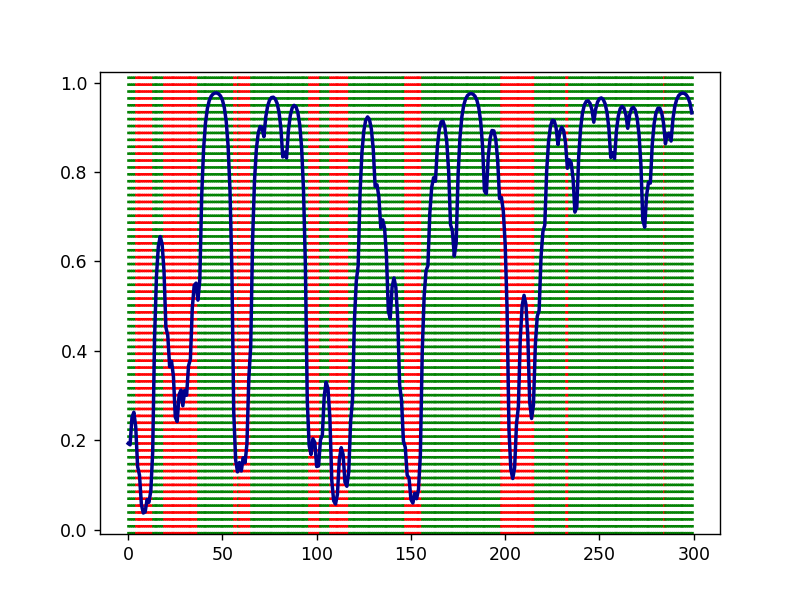

In [16]:
# График апостериорных вероятностей (синяя линия) в сравнении со смоделированным путем
# Красный участок показывает, при каких бросках использовадась неправильная кость, зеленый - правильная

for i in range(0, L):
    if hid_seq[i] == 0:
        plt.axvline(x = i, linestyle = ':', color = 'g')
    else:
        plt.axvline(x = i, linestyle = ':', color = 'r')
xx = np.arange(0, L)
plt.plot(xx, P[:,0], color = 'darkblue', linewidth = 2)

In [24]:
# Алгоритм Баума-Уэлча

# Определим случайные значения для матриц перехода и наблюдения
Tr_bw = np.array([[0.8, 0.2], 
                  [0.3, 0.7]])
Em_bw = np.array([[0.1, 0.2, 0.3, 0.1, 0.1, 0.2],
                  [0.05, 0.05, 0.1, 0.1, 0.6, 0.1]])
pi0_bw = [0.6, 0.4]

f_k_bw, forw_prob_bw = forward(Tr_bw, Em_bw, pi0_bw, L, obs_seq)
b_k_bw = backward(Tr_bw, Em_bw, pi0_bw, L, obs_seq)[0]

# оценка параметров матрицы переходов
A = np.zeros((M, M))
a = np.zeros((M, M))

for i in range(M):
    for j in range(M):
        for k in range(1, L - 1):
            A[i, j] += f_k_bw[k, i] * Tr_bw[i, j] * Em_bw[j, obs_seq[k] - 1] * b_k_bw[j, k + 1]
A /= forw_prob_bw
for i in range(M):
    for j in range(M):
        a[i, j] = A[i, j] / np.sum(A[i])
print(a)

# оценка параметров матрицы наблюдений
E = np.zeros((M, K))
e = np.zeros((M, K))

for i in range(M):
    for j in range(K):
        for k in range(0, L):
            if obs_seq[k] == j + 1:
                E[i, j] += f_k_bw[k, i] * b_k_bw[i, k]
for i in range(M):
    for j in range(K):
        e[i, j] = E[i, j] / np.sum(E[i])
print(e)

[[0.87829656 0.12170344]
 [0.18911321 0.81088679]]
[[0.17238825 0.15579902 0.12928569 0.15701893 0.06530077 0.32020735]
 [0.11467532 0.06109246 0.05848915 0.16796225 0.40069919 0.19708163]]
